In [ ]:
!git clone https://github.com/yunjey/stargan.git
%cd stargan


Cloning into 'stargan'...
remote: Enumerating objects: 162, done.
remote: Total 162 (delta 0), reused 0 (delta 0), pack-reused 162 (from 1)
Receiving objects: 100% (162/162), 13.76 MiB | 13.14 MiB/s, done.
Resolving deltas: 100% (79/79), done.
/content/stargan


In [ ]:
!pip install numpy opencv-python Pillow


In [ ]:
!mkdir pretrained_model
!wget https://github.com/yunjey/stargan/releases/download/v0.1/celeba.tar.gz
!tar -xvzf celeba.tar.gz -C pretrained_model


--2025-04-10 08:48:50--  https://github.com/yunjey/stargan/releases/download/v0.1/celeba.tar.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-10 08:48:51 ERROR 404: Not Found.

tar (child): celeba.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
!bash download.sh pretrained-celeba-128x128


for details.

--2025-04-10 08:49:36--  https://www.dropbox.com/s/7e966qq0nlxwte4/celeba-128x128-5attrs.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/08n4ltopu9i91m4vqkknz/celeba-128x128-5attrs.zip?rlkey=msbqr4azhf50hl53cvosfqdy8&dl=0 [following]
--2025-04-10 08:49:36--  https://www.dropbox.com/scl/fi/08n4ltopu9i91m4vqkknz/celeba-128x128-5attrs.zip?rlkey=msbqr4azhf50hl53cvosfqdy8&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc649dbb6432b63c12e0db40c441.dl.dropboxusercontent.com/cd/0/inline/Cnitjm8WSqne4UoKBt2MmVCJEZUUY8rQzLFJOcFjIdvHgL_bOepi1gaI7eMYSB2EYtOGPHoTKINK_k2fF8wUpoVBEKwQOLJgkXaQrTpTdcVlkO-uih-TXO98MvX7h0tdpJT5icXsW_u106F8pVrDXD09/file# [following]
--2025-04-10 08:49:37--  https:/

Saving test.jpg to test.jpg


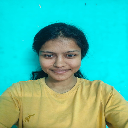

In [ ]:
import cv2
import numpy as np
from google.colab import files
from PIL import Image

# Upload your image
uploaded = files.upload()

# Read and preprocess the image
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Resize image to 128x128
img_resized = cv2.resize(img, (128, 128))

# Normalize the image (scale pixel values between -1 and 1)
img_normalized = (img_resized / 127.5) - 1.0
img_normalized = np.expand_dims(img_normalized, axis=0).astype(np.float32)

# Show the image
Image.fromarray(img_resized)


In [10]:
!ls


data_loader.py	jpg	 logger.py  model.py	      __pycache__  solver.py  stargan_celeba_128
download.sh	LICENSE  main.py    pretrained_model  README.md    stargan    test.jpg


In [12]:
import os
os.makedirs('/content/data/celeba', exist_ok=True)  # Create the folder if it doesn't exist
os.rename('/content/list_attr_celeba.txt', '/content/data/celeba/list_attr_celeba.txt')  # Move the file


In [ ]:
!python main.py --mode test --dataset CelebA --image_size 128 --c_dim 5 \
                 --selected_attrs Young Male Black_Hair Blond_Hair Brown_Hair \
                 --model_save_dir='./stargan_celeba_128/models' \
                 --result_dir='./stargan_celeba_128/results'


In [13]:
!python main.py --mode test --dataset CelebA --image_size 128 --c_dim 5 \
                 --selected_attrs Young Male Black_Hair Blond_Hair Brown_Hair \
                 --model_save_dir='./stargan_celeba_128/models' \
                 --result_dir='./stargan_celeba_128/results'


Namespace(c_dim=5, c2_dim=8, celeba_crop_size=178, rafd_crop_size=256, image_size=128, g_conv_dim=64, d_conv_dim=64, g_repeat_num=6, d_repeat_num=6, lambda_cls=1, lambda_rec=10, lambda_gp=10, dataset='CelebA', batch_size=16, num_iters=200000, num_iters_decay=100000, g_lr=0.0001, d_lr=0.0001, n_critic=5, beta1=0.5, beta2=0.999, resume_iters=None, selected_attrs=['Young', 'Male', 'Black_Hair', 'Blond_Hair', 'Brown_Hair'], test_iters=200000, num_workers=1, mode='test', use_tensorboard=True, celeba_image_dir='data/celeba/images', attr_path='data/celeba/list_attr_celeba.txt', rafd_image_dir='data/RaFD/train', log_dir='stargan/logs', model_save_dir='./stargan_celeba_128/models', sample_dir='stargan/samples', result_dir='./stargan_celeba_128/results', log_step=10, sample_step=1000, model_save_step=10000, lr_update_step=1000)
Traceback (most recent call last):
  File "/content/stargan/main.py", line 110, in <module>
    main(config)
  File "/content/stargan/main.py", line 30, in main
    celeb

In [19]:
import os

# Find where test.jpg actually is
for root, dirs, files in os.walk('/content'):
    for file in files:
        if 'test.jpg' in file:
            print(os.path.join(root, file))


/content/test.jpg
/content/stargan/test.jpg


In [20]:
from PIL import Image

image_path = '/content/test.jpg'  # use your corrected path
image_size = 128

# Load and verify
img = Image.open(image_path).convert('RGB')
img = img.resize((image_size, image_size))
print("Image loaded successfully:", img.size, img.mode)
img.show()


Image loaded successfully: (128, 128) RGB


In [37]:
!python main.py --mode test \
    --dataset CelebA \
    --image_size 128 \
    --c_dim 5 \
    --selected_attrs Young Male Black_Hair Blond_Hair Brown_Hair \
    --model_save_dir='./stargan_celeba_128/models' \
    --result_dir='./stargan_celeba_128/results' \
    --image_path='/test.jpg' \
    --attr_path='/content/data/celeba/list_attr_celeba.txt'  # Updated path


Namespace(c_dim=5, c2_dim=8, celeba_crop_size=178, rafd_crop_size=256, image_size=128, g_conv_dim=64, d_conv_dim=64, g_repeat_num=6, d_repeat_num=6, lambda_cls=1, lambda_rec=10, lambda_gp=10, dataset='CelebA', batch_size=16, num_iters=200000, num_iters_decay=100000, g_lr=0.0001, d_lr=0.0001, n_critic=5, beta1=0.5, beta2=0.999, resume_iters=None, selected_attrs=['Young', 'Male', 'Black_Hair', 'Blond_Hair', 'Brown_Hair'], test_iters=200000, num_workers=1, mode='test', use_tensorboard=True, celeba_image_dir='data/celeba/images', attr_path='/content/data/celeba/list_attr_celeba.txt', rafd_image_dir='data/RaFD/train', log_dir='stargan/logs', model_save_dir='./stargan_celeba_128/models', sample_dir='stargan/samples', result_dir='./stargan_celeba_128/results', image_path='/content/test.jpg', log_step=10, sample_step=1000, model_save_step=10000, lr_update_step=1000, model_path='/content/stargan/stargan_celeba_128/models/200000-G.ckpt')
Finished preprocessing the CelebA dataset...
Generator(
  

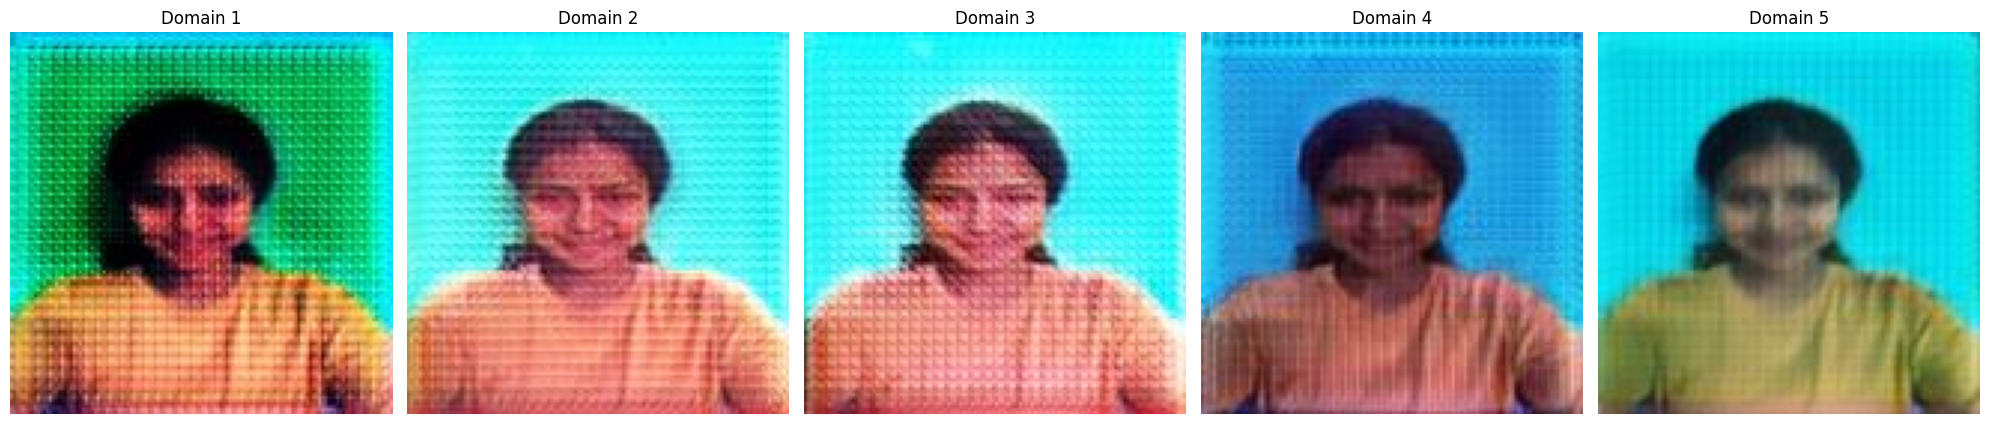

In [38]:
import matplotlib.pyplot as plt
from PIL import Image

# Paths to your images
paths = [f"/content/stargan/result_domain_{i+1}.jpg" for i in range(5)]

# Create a subplot with 5 images in 1 row
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, path in enumerate(paths):
    img = Image.open(path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f'Domain {i+1}')

plt.tight_layout()
plt.show()


#Testing

In [48]:
!python main.py --mode test \
    --dataset CelebA \
    --image_size 128 \
    --c_dim 5 \
    --selected_attrs Wearing_Lipstick Gray_Hair Pale_Skin Brown_Hair Young \
    --model_save_dir='./stargan_celeba_128/models' \
    --result_dir='./stargan_celeba_128/results' \
    --image_path='/content/celeba1.jpg' \
    --attr_path='/content/data/celeba/list_attr_celeba.txt'  # Updated path


Namespace(c_dim=5, c2_dim=8, celeba_crop_size=178, rafd_crop_size=256, image_size=128, g_conv_dim=64, d_conv_dim=64, g_repeat_num=6, d_repeat_num=6, lambda_cls=1, lambda_rec=10, lambda_gp=10, dataset='CelebA', batch_size=16, num_iters=200000, num_iters_decay=100000, g_lr=0.0001, d_lr=0.0001, n_critic=5, beta1=0.5, beta2=0.999, resume_iters=None, selected_attrs=['Wearing_Lipstick', 'Gray_Hair', 'Pale_Skin', 'Brown_Hair', 'Young'], test_iters=200000, num_workers=1, mode='test', use_tensorboard=True, celeba_image_dir='data/celeba/images', attr_path='/content/data/celeba/list_attr_celeba.txt', rafd_image_dir='data/RaFD/train', log_dir='stargan/logs', model_save_dir='./stargan_celeba_128/models', sample_dir='stargan/samples', result_dir='./stargan_celeba_128/results', image_path='/content/test.jpg', log_step=10, sample_step=1000, model_save_step=10000, lr_update_step=1000, model_path='/content/stargan/stargan_celeba_128/models/200000-G.ckpt')
Finished preprocessing the CelebA dataset...
Gen

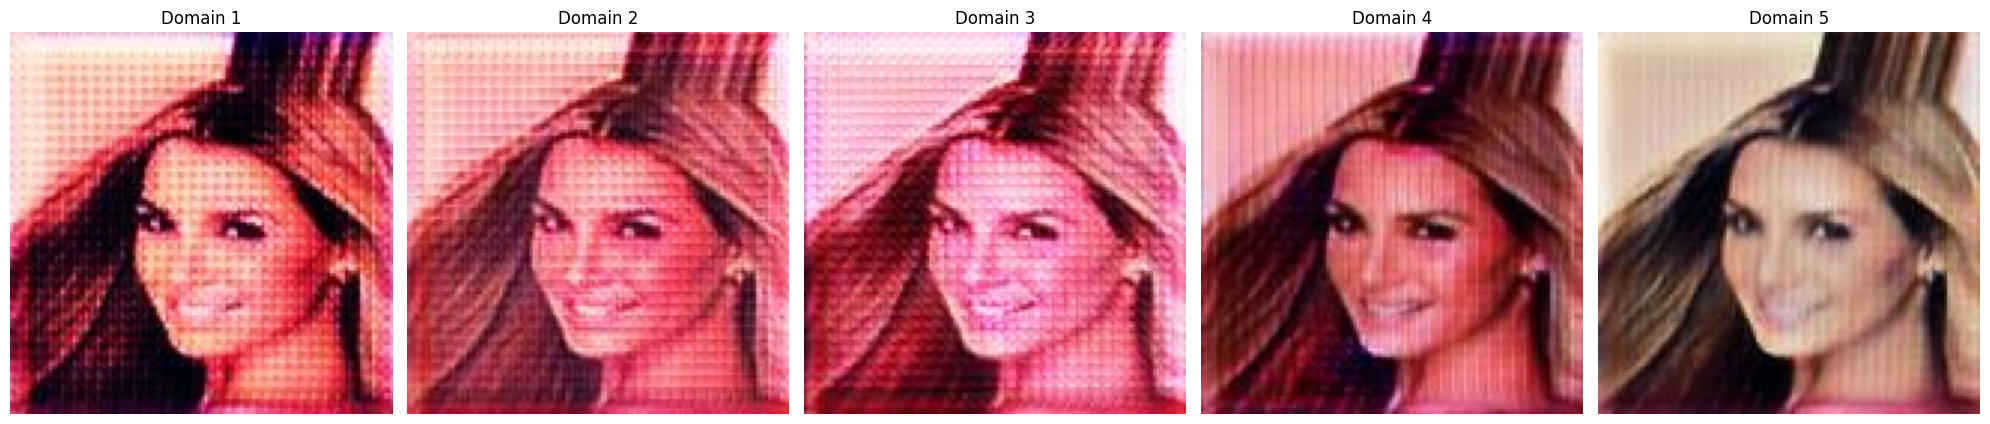

In [41]:
-import matplotlib.pyplot as plt
from PIL import Image

# Paths to your images
paths = [f"/content/stargan/result_domain_{i+1}.jpg" for i in range(5)]

# Create a subplot with 5 images in 1 row
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, path in enumerate(paths):
    img = Image.open(path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f'Domain {i+1}')

plt.tight_layout()
plt.show()


In [49]:
from PIL import Image
img = Image.open('/content/test.jpg').convert('RGB')
img = img.resize((128, 128))
img.save('/content/celeba1.jpg')


In [51]:
!python main.py --mode test \
    --dataset CelebA \
    --image_size 128 \
    --c_dim 5 \
    --selected_attrs Black_Hair Blond_Hair Brown_Hair Male Young \
    --model_save_dir='stargan_celeba_128/models' \
    --result_dir='stargan_celeba_128/results' \
    --image_path='/content/celeba1.jpg' \
    --attr_path='/content/data/celeba/list_attr_celeba.txt'


Namespace(c_dim=5, c2_dim=8, celeba_crop_size=178, rafd_crop_size=256, image_size=128, g_conv_dim=64, d_conv_dim=64, g_repeat_num=6, d_repeat_num=6, lambda_cls=1, lambda_rec=10, lambda_gp=10, dataset='CelebA', batch_size=16, num_iters=200000, num_iters_decay=100000, g_lr=0.0001, d_lr=0.0001, n_critic=5, beta1=0.5, beta2=0.999, resume_iters=None, selected_attrs=['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Male', 'Young'], test_iters=200000, num_workers=1, mode='test', use_tensorboard=True, celeba_image_dir='data/celeba/images', attr_path='/content/data/celeba/list_attr_celeba.txt', rafd_image_dir='data/RaFD/train', log_dir='stargan/logs', model_save_dir='stargan_celeba_128/models', sample_dir='stargan/samples', result_dir='stargan_celeba_128/results', image_path='/content/test.jpg', log_step=10, sample_step=1000, model_save_step=10000, lr_update_step=1000, model_path='/content/stargan/stargan_celeba_128/models/200000-G.ckpt')
Finished preprocessing the CelebA dataset...
Generator(
  (mai